In [127]:
import requests as R
import numpy as np
import json
import sqlite3 as sql
import matplotlib.pylab as plt
import datetime as DT
from smooth import smooth


In [128]:
def loadperiod (start_date,end_date):
    baseurl="http://odin.rss.chalmers.se/rest_api/v5/level2/development/ALL/area"
    prod="?product=Temperature%20%2F%20545%20GHz%20%2F%2015%20to%2065%20km"
    area="&min_lat=-10&max_lat=10&min_altitude=0000&max_altitude=60000&start_time={0}&end_time={1}"
    request=baseurl+prod+area
    a=R.get(request.format(start_date,end_date))
    return json.loads(a.text)

In [129]:
def loadozone (start_date,end_date):
    baseurl="http://odin.rss.chalmers.se/rest_api/v5/level2/development/ALL/area"
    prod="?product=O3%20%2F%20545%20GHz%20%2F%2020%20to%2085%20km"
    area="&min_lat=-5&max_lat=5&min_altitude=0000&max_altitude=60000&start_time={0}&end_time={1}"
    request=baseurl+prod+area
    a=R.get(request.format(start_date,end_date))
    return json.loads(a.text)

In [130]:
dataozone=loadozone("2015-05-01","2015-05-07")['Data']
data=loadperiod("2015-05-01","2015-05-07")['Data']

In [131]:
start_date=DT.date(2003,1,1)
fivedays=DT.timedelta(days=5)
start_date.isoformat()
dates=[]
temps=[]
while start_date < DT.date(2018,5,1):
    print (start_date.strftime("%Y-%m-%d"))
    data=loadperiod(start_date.isoformat(), (start_date+fivedays).isoformat())['Data']
    #print len(data)
    temp=np.array([data[i]['Temperature'] for i in range(len(data)) if len(data[i]['Temperature'])==11],dtype=float)
    #print temp.shape
    #print np.median(temp,axis=0)
    if len(data)!=0:
        dates.append(start_date+DT.timedelta(days=3))
        temps.append(np.median(temp,axis=0))
    start_date+=fivedays

2003-01-01
2003-01-06
2003-01-11
2003-01-16
2003-01-21
2003-01-26
2003-01-31
2003-02-05
2003-02-10
2003-02-15
2003-02-20
2003-02-25
2003-03-02
2003-03-07
2003-03-12
2003-03-17
2003-03-22
2003-03-27
2003-04-01
2003-04-06
2003-04-11
2003-04-16
2003-04-21
2003-04-26
2003-05-01
2003-05-06
2003-05-11
2003-05-16
2003-05-21
2003-05-26
2003-05-31
2003-06-05
2003-06-10
2003-06-15
2003-06-20
2003-06-25
2003-06-30
2003-07-05
2003-07-10
2003-07-15
2003-07-20
2003-07-25
2003-07-30
2003-08-04
2003-08-09
2003-08-14
2003-08-19
2003-08-24
2003-08-29
2003-09-03
2003-09-08
2003-09-13
2003-09-18
2003-09-23
2003-09-28
2003-10-03
2003-10-08
2003-10-13
2003-10-18
2003-10-23
2003-10-28
2003-11-02
2003-11-07
2003-11-12
2003-11-17
2003-11-22
2003-11-27
2003-12-02
2003-12-07
2003-12-12
2003-12-17
2003-12-22
2003-12-27
2004-01-01
2004-01-06
2004-01-11
2004-01-16
2004-01-21
2004-01-26
2004-01-31
2004-02-05
2004-02-10
2004-02-15
2004-02-20
2004-02-25
2004-03-01
2004-03-06
2004-03-11
2004-03-16
2004-03-21
2004-03-26

2013-03-14
2013-03-19
2013-03-24
2013-03-29
2013-04-03
2013-04-08
2013-04-13
2013-04-18
2013-04-23
2013-04-28
2013-05-03
2013-05-08
2013-05-13
2013-05-18
2013-05-23
2013-05-28
2013-06-02
2013-06-07
2013-06-12
2013-06-17
2013-06-22
2013-06-27
2013-07-02
2013-07-07
2013-07-12
2013-07-17
2013-07-22
2013-07-27
2013-08-01
2013-08-06
2013-08-11
2013-08-16
2013-08-21
2013-08-26
2013-08-31
2013-09-05
2013-09-10
2013-09-15
2013-09-20
2013-09-25
2013-09-30
2013-10-05
2013-10-10
2013-10-15
2013-10-20
2013-10-25
2013-10-30
2013-11-04
2013-11-09
2013-11-14
2013-11-19
2013-11-24
2013-11-29
2013-12-04
2013-12-09
2013-12-14
2013-12-19
2013-12-24
2013-12-29
2014-01-03
2014-01-08
2014-01-13
2014-01-18
2014-01-23
2014-01-28
2014-02-02
2014-02-07
2014-02-12
2014-02-17
2014-02-22
2014-02-27
2014-03-04
2014-03-09
2014-03-14
2014-03-19
2014-03-24
2014-03-29
2014-04-03
2014-04-08
2014-04-13
2014-04-18
2014-04-23
2014-04-28
2014-05-03
2014-05-08
2014-05-13
2014-05-18
2014-05-23
2014-05-28
2014-06-02
2014-06-07

KeyboardInterrupt: 

In [132]:
np.array(temps).shape
data


[{'AVK': [[-0.00020288762749280344,
    -0.006317576732632585,
    -0.011969565040742551,
    -0.008145278429022398,
    -0.14311791843703697,
    0.2328505173846247,
    0.7458516858038355,
    0.14154503525533865,
    -0.020242206784427164,
    -0.012695572571783295,
    -0.0021789310129504127,
    0.0005536885216563022,
    0.0010046584980777564,
    0.001338909485002532,
    0.001146942766011038,
    0.0007295650819572891,
    0.0004118664527960531,
    0.0002210694436132826,
    0.00011634894243082077,
    5.840415708819506e-05,
    2.6892078055508857e-05,
    1.2553949630127478e-05],
   [-0.00015467515322480484,
    -0.005207671493524618,
    -0.014285440185050527,
    -0.007277948395773958,
    0.01104500726754399,
    -0.11939676902859098,
    0.27587096439144576,
    0.6565523201931976,
    0.18307499354915893,
    -0.012691932931838455,
    -0.009004821761366785,
    -0.002259709824151881,
    -0.0020760647294672616,
    -0.0026974737138082973,
    -0.0022267652627992666,
   

In [133]:
np.save('datestemps5S-5N.npy', [dates,temps])

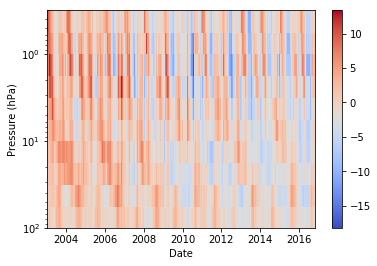

In [134]:
%matplotlib inline
plt.pcolor(dates,np.array(data[3]['Pressure'])/100,(np.array(temps)-np.array(temps).mean(axis=0)).T,cmap="coolwarm")
plt.ylabel('Pressure (hPa)')
plt.xlabel('Date')
ax=plt.gca()
ax.set_yscale("log")
ax.invert_yaxis()
plt.colorbar()
plt.show()

(207, 11)
[190.81044782 201.49216181 210.99957738 220.34526591 228.15284167
 232.83081639 247.80893668 260.09050496 262.30979789 252.94459466
 240.99741863]


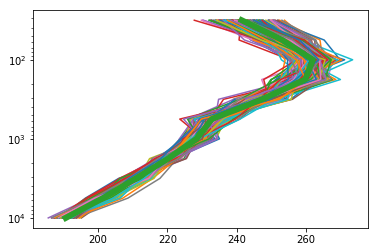

In [135]:
temp=np.array([data[i]['Temperature'] for i in range(len(data)) if len(data[i]['Temperature'])==11],dtype=float)
print (temp.shape)
print (np.median(temp,axis=0))
[plt.semilogy(data[i]['Temperature'],data[i]['Pressure']) for i in range(len(data))]
ax=plt.gca()
ax.invert_yaxis()
ax.plot(np.mean(temp,axis=0),data[3]['Pressure'],linewidth=6)
plt.show()

In [ ]:
temp

In [33]:
data

[]

In [26]:
temparray=np.array(temps)

In [138]:

ordinals=[dates[i].toordinal() for i in range(len(dates))]
level=3
fit=np.polyfit( ordinals,temparray[:,level],1)
fit_fn=np.poly1d(fit)
plt.plot()
print (fit[0]*365 ,fit[1])
plt.plot(dates,temparray[:,level],dates,fit_fn(ordinals))
plt.show()

TypeError: expected x and y to have same length

In [139]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 8]
from scipy.optimize import curve_fit
def linplusannual (ordinal,a,b,c,d): 
    return a+b*ordinal+c*np.cos(2*np.pi*ordinal/365.)+d*np.sin(2*np.pi*ordinal/365.)
level=2
p,co=curve_fit(linplusannual,ordinals,temparray[:,level] )
print (p)
print (linplusannual(ordinals[0],p[0],p[1],p[2],p[3]))
plt.plot(dates,temparray[:,level],dates,linplusannual(np.array(ordinals),p[0],p[1],p[2],p[3]))
plt.show()


ValueError: operands could not be broadcast together with shapes (915,) (986,) 

In [140]:
newtemps=[]
for level in range(temparray.shape[1]):
    p,co=curve_fit(linplusannual,ordinals,temparray[:,level] )
    newtemps.append(temparray[:,level]-linplusannual(np.array(ordinals),p[0],p[1],p[2],p[3]))
    

ValueError: operands could not be broadcast together with shapes (915,) (986,) 

TypeError: Input z must be a 2D array.

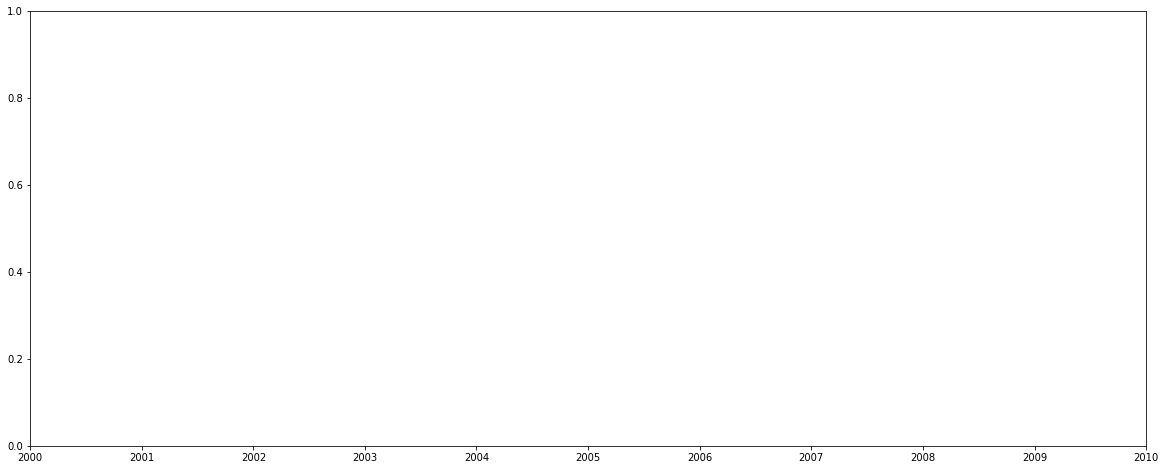

In [141]:
%matplotlib inline
smoothedT=np.array(newtemps).copy()
for i in range(smoothedT.shape[0]):
    smoothedT[i,:]=smooth(np.array(newtemps)[i,:],11)
plt.rcParams['figure.figsize'] = [20, 8]
cs=plt.contourf(dates,np.array(data[3]['Pressure'])/100,smoothedT,[-10,-8,-5,-2,0,2,5,8,10],cmap="coolwarm")
ax=plt.gca()
ax.contour(cs,levels=cs.levels[::2],colors='k')
plt.ylabel('Pressure (hPa)')
plt.xlabel('Date')
ax.set_ylim([0.1,100])
ax.set_xlim([DT.date(2003,1,1),DT.date(2018,1,1)])
ax.set_yscale("log")
ax.invert_yaxis()
plt.colorbar()
plt.show()

In [142]:
smoothedT.shape

(0,)

In [143]:
start_date=DT.date(2003,01,01)
fivedays=DT.timedelta(days=5)
start_date.isoformat()
datesozone=[]
ozones=[]
while start_date < DT.date(2018,5,1):)
    print (start_date.strftime("%Y-%m-%d")
    dataozone=loadozone(start_date.isoformat(), (start_date+fivedays).isoformat())['Data']
    #print len(data)
    ozone=np.array([dataozone[i]['VMR'] for i in range(len(dataozone)) if len(dataozone[i]['VMR'])==24],dtype=float)
    #print len(dataozone)
    print ozone.shape
    #print np.median(ozone,axis=0)
    if ozone.shape[0]<>0:
        datesozone.append(start_date+DT.timedelta(days=3))
        ozones.append(np.median(ozone,axis=0))
    start_date+=fivedays


SyntaxError: invalid token (<ipython-input-143-f270c536c182>, line 1)

In [144]:
plt.rcParams['figure.figsize'] = [20, 8]
ozonearray=np.array(ozones)
dd=np.array(datesozone,dtype=np.datetime64)
plt.pcolor(datesozone,np.array(dataozone[3]['Pressure'])/100,(ozonearray-ozonearray.mean(axis=0)).T*1e6,cmap="coolwarm")
plt.ylabel('Pressure (hPa)')
plt.xlabel('Date')
ax=plt.gca()
ax.set_yscale("log")
ax.set_xlim([DT.date(2010,1,1),DT.date(2021,1,1)])
ax.set_ylim([3,200])
ax.invert_yaxis()
plt.colorbar()
plt.show()

NameError: name 'ozones' is not defined

In [145]:
plt.plot(datesozone,ozonearray[:,5])
plt.show()

NameError: name 'datesozone' is not defined

In [146]:
from scipy.interpolate import interp1d
doys=range(1,366)
interpo3=[]
for y in range(2003,2018):
    aa=[(dd[i].item().timetuple().tm_yday, ozonearray[i,:]) for i in range(len(dd)) if dd[i].item().year==y]
    dy,o3=zip(*aa)
    dy=np.array(dy)
    o3=np.array(o3)
    f=interp1d(dy,o3.T, fill_value="extrapolate")
    interpo3.append(f(doys))


TypeError: object of type 'datetime.date' has no len()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: x and y must have same first dimension, but have shapes (365,) and (1,)

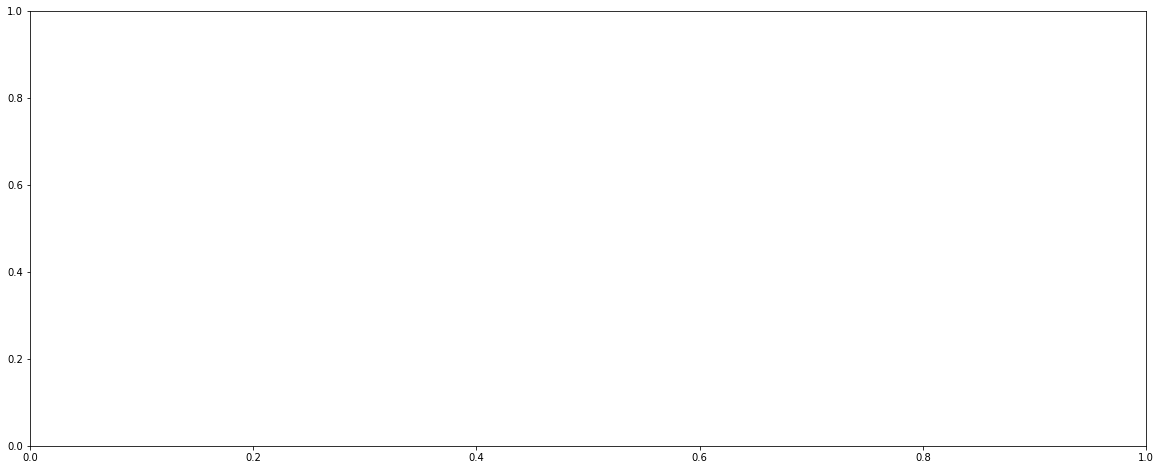

In [147]:
yearmean=np.array(interpo3).mean(axis=0)
plt.plot(doys,yearmean.T)
plt.show()


In [148]:
%matplotlib inline
from matplotlib.colors import Normalize
norm = Normalize(vmin = -1.5, vmax = 1.5)
plt.rcParams['figure.figsize'] = [20, 8]
fyear=interp1d(doys,yearmean, fill_value="extrapolate")
doy=np.array([dd[i].item().timetuple().tm_yday for i in range(len(dd))])
avgremoved=(ozonearray-fyear(doy).T).T*1e6
smoothed=avgremoved.copy()
for i in range(smoothed.shape[0]):
    smoothed[i,:]=smooth(avgremoved[i,:],5)
clevels=[-1.5,-1.25,-1.,-.75,-.5,-.25,0,.25,.5,.75,1,1.25,1.5]
cs=plt.contourf(datesozone,np.array(dataozone[3]['Pressure'])/100,smoothed,clevels,cmap="PRGn",extend="both")
plt.clim(-1.5,1.5)
ax=plt.gca()
ax.contour(cs,levels=cs.levels[::2],colors='k', norm = norm)
plt.ylabel('Pressure (hPa)')
plt.xlabel('Date')
ax=plt.gca()
ax.set_yscale("log")
ax.set_xlim([DT.date(2010,1,1),DT.date(2020,1,1)])
ax.set_ylim([3,200])
ax.invert_yaxis()
plt.colorbar()
plt.show()

ValueError: x and y arrays must be equal in length along interpolation axis.

In [149]:
temps[1].shape

(11,)

Make monthly averages

In [150]:
monavg=np.zeros((temps[0].shape[0],12))
moncount=np.zeros(12)
for jd,dd in enumerate(dates):
    monavg[:,dd.month-1] += temps[jd] 
    moncount[dd.month-1]+=1
for i in range(12):
    monavg[:,i]=monavg[:,i]/moncount[i]

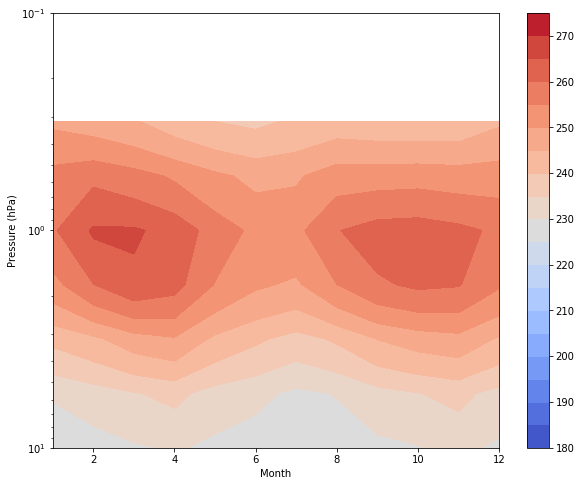

In [151]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
plt.contourf(np.arange(12)+1,np.array(data[3]['Pressure'])/100,monavg,np.arange(180,280,5),cmap="coolwarm")
plt.ylabel('Pressure (hPa)')
plt.xlabel('Month')
ax=plt.gca()
ax.set_yscale("log")
ax.set_ylim([0.1,10])
ax.invert_yaxis()
plt.colorbar()
plt.show()

In [152]:
msis=np.loadtxt('msistropical.txt')

In [153]:
msis[0]

array([0.000e+00, 1.143e-03, 3.015e+02])

In [154]:
msis[0][1]/1000*1e6*287.058*msis[0][2]# /0.02897*1.3806e-23*msis[0][2]

98924.34914099997

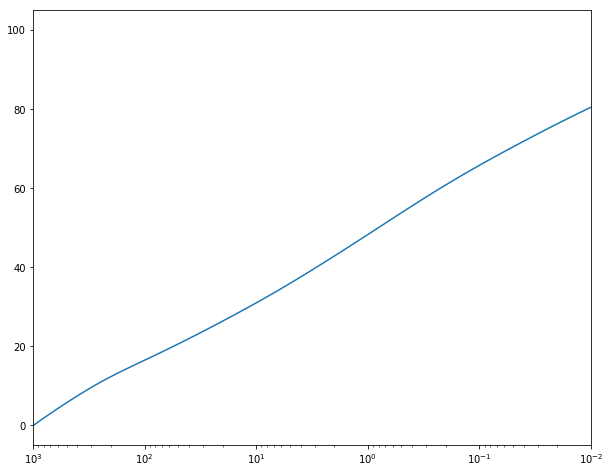

In [155]:
press=[msis[i][1]/1000*1e6*287.058*msis[i][2]/100 for i in range(len(msis))]
plt.semilogx(press,np.array(msis)[:,0])
ax=plt.gca()
ax.set_xscale("log")
ax.set_xlim([0.01,1000])
ax.invert_xaxis()

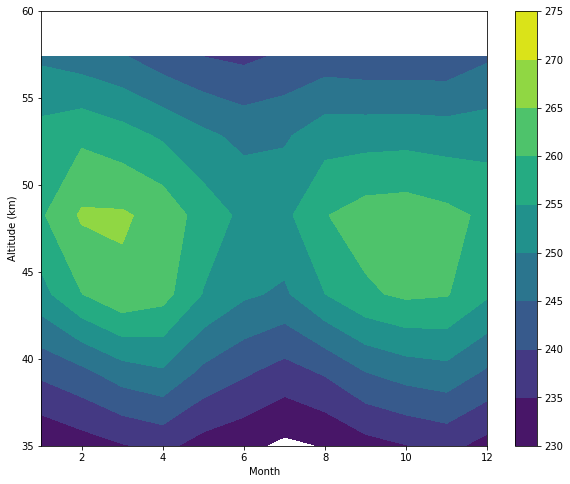

In [158]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
alts=np.interp(np.array(data[3]['Pressure'])/100,press[::-1],np.array(msis)[::-1,0])
plt.contourf(np.arange(12)+1,alts,monavg,np.arange(230,280,5),cmap="viridis")
plt.ylabel('Altitude (km)')
plt.xlabel('Month')
ax=plt.gca()
ax.set_ylim([35,60])
plt.colorbar()
plt.show()

In [106]:
press[::-1]

[0.00024935052041279995,
 0.000300671869179,
 0.00036334093644899997,
 0.00044020901192520003,
 0.00053416326756,
 0.000649214104554,
 0.0007899494560979999,
 0.0009607460955179998,
 0.0011692285703520002,
 0.001420979871642,
 0.00172638690606,
 0.00209409528645,
 0.0025357337323920004,
 0.0030660722391600004,
 0.00369853277766,
 0.004450395665376,
 0.00534234457944,
 0.006397156423920001,
 0.00763860189768,
 0.009087613270079998,
 0.010796940319199998,
 0.01277946620808,
 0.015091213176,
 0.017777318222880003,
 0.020901895753019997,
 0.02451380877918,
 0.0286945760322,
 0.03354018109554,
 0.0391719203271,
 0.04569514401287999,
 0.05322183921983999,
 0.0619182383652,
 0.07191844920539998,
 0.08337456081000001,
 0.09653060118479999,
 0.11147662042439999,
 0.12858188994,
 0.1479695576136,
 0.169923552513,
 0.1947554186856,
 0.22275700799999998,
 0.2544356380596,
 0.2902394064024,
 0.3304446350592001,
 0.3758724821448,
 0.4270293179711999,
 0.4846275630827999,
 0.5499484434509999,
 0.6235